# Análisis Discriminante Gaussiano (GDA)

El **Análisis Discriminante Gaussiano** (GDA, por sus siglas en inglés) es un método de clasificación supervisada en el campo del aprendizaje automático y la estadística. Es un modelo probabilístico que asume que los datos de cada clase siguen una distribución normal (gaussiana) y utiliza esta suposición para estimar las probabilidades de pertenencia a cada clase.

## Conceptos clave del GDA:

1. **Distribución Gaussiana (Normal)**:
   - El GDA asume que los datos de cada clase \( k \) se distribuyen según una distribución normal multivariada:
     $$
     P(\mathbf{x} | y = k) = \frac{1}{(2\pi)^{n/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k)\right)
     $$
     Donde:
     - $\mathbf{x}$ es el vector de características.
     - $\mu_k$ es el vector de medias de la clase \( k \).
     - $\Sigma_k$ es la matriz de covarianza de la clase \( k \).
     - $\Sigma_k|$ es el determinante de la matriz de covarianza.

2. **Clases**:
   - El GDA se utiliza para problemas de clasificación en los que las etiquetas $y$ son discretas (por ejemplo, clasificación binaria o multiclase).

3. **Probabilidad a priori**:
   - El modelo también estima la probabilidad a priori $P(y = k)$ de cada clase, que representa la proporción de datos que pertenecen a la clase $k$.

4. **Regla de Bayes**:
   - Para clasificar un nuevo punto $\mathbf{x}$, el GDA utiliza la regla de Bayes para calcular la probabilidad posterior:
     $$
     P(y = k | \mathbf{x}) = \frac{P(\mathbf{x} | y = k) P(y = k)}{P(\mathbf{x})}
     $$
     Donde $P(\mathbf{x})$ es la evidencia (normalización constante).

5. **Decisión de clasificación**:
   - El punto $\mathbf{x}$ se asigna a la clase $ k$ que maximiza la probabilidad posterior $P(y = k | \mathbf{x})$.

## Tipos de GDA:

1. **GDA con matriz de covarianza compartida**:
   - En este caso, todas las clases comparten la misma matriz de covarianza $\Sigma$. Esto simplifica el modelo y reduce el número de parámetros a estimar.
   - La frontera de decisión entre clases es lineal (hiperplano).

2. **GDA con matriz de covarianza específica**:
   - Cada clase tiene su propia matriz de covarianza $\Sigma_k$.
   - La frontera de decisión entre clases es cuadrática (más flexible pero con más parámetros).

## Pasos para implementar GDA:

1. **Estimación de parámetros**:
   - Calcular las medias $\mu_k$ y las matrices de covarianza $\Sigma_k$ para cada clase a partir de los datos de entrenamiento.
   - Estimar las probabilidades a priori $P(y = k)$.

2. **Clasificación**:
   - Para un nuevo punto calcular $P(y = k | \mathbf{x})$ para cada clase y asignar la clase con mayor probabilidad.

## Ventajas:
- Es un modelo probabilístico, por lo que proporciona estimaciones de probabilidad.
- Funciona bien cuando los datos siguen una distribución aproximadamente gaussiana.
- Es eficiente computacionalmente.

## Desventajas:
- La suposición de normalidad puede no ser válida en todos los casos.
- En problemas de alta dimensionalidad, la estimación de la matriz de covarianza puede ser inestable.

## Relación con otros modelos:
- El GDA está relacionado con el **Análisis Discriminante Lineal** (LDA), que es un caso especial de GDA donde todas las clases comparten la misma matriz de covarianza.
- También está relacionado con la **Regresión Logística**, ya que ambos modelos pueden usarse para clasificación, pero el GDA asume una distribución específica para los datos.

En resumen, el GDA es un método de clasificación basado en la suposición de que los datos siguen una distribución gaussiana, y utiliza esta suposición para modelar las fronteras de decisión entre clases.

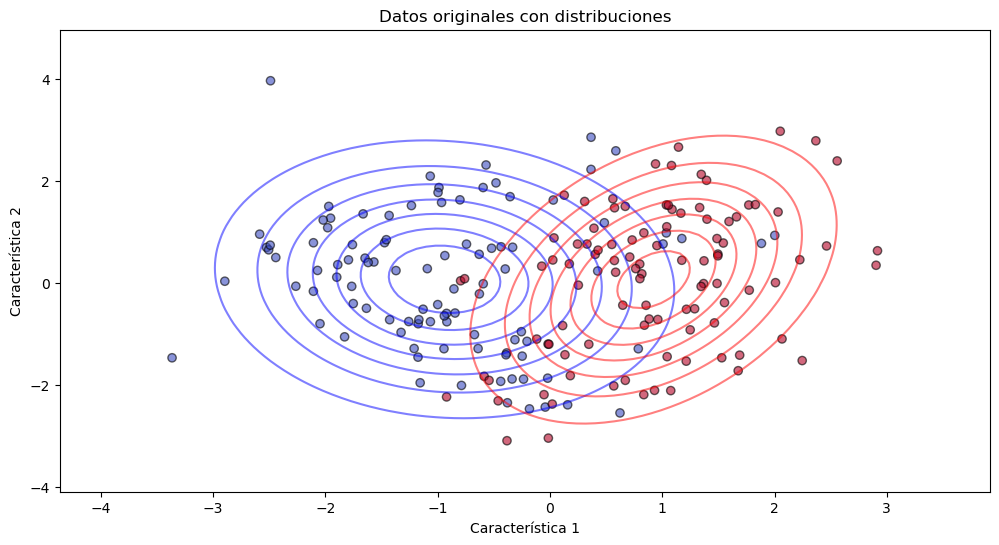

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

# Generamos datos sintéticos
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicamos Análisis Discriminante Lineal
lda = LDA()
lda.fit(X_train, y_train)
X_lda = lda.transform(X)

# Estimamos las distribuciones normales de cada clase
mean_class_0 = X[y == 0].mean(axis=0)
cov_class_0 = np.cov(X[y == 0].T)
mean_class_1 = X[y == 1].mean(axis=0)
cov_class_1 = np.cov(X[y == 1].T)

gx, gy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100), 
                      np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
grids = np.c_[gx.ravel(), gy.ravel()]

pdf_0 = multivariate_normal(mean_class_0, cov_class_0).pdf(grids).reshape(gx.shape)
pdf_1 = multivariate_normal(mean_class_1, cov_class_1).pdf(grids).reshape(gx.shape)

# Visualización de los datos transformados con contour plots
plt.figure(figsize=(12,6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.6)
plt.contour(gx, gy, pdf_0, colors='blue', alpha=0.5)
plt.contour(gx, gy, pdf_1, colors='red', alpha=0.5)
plt.title("Datos originales con distribuciones")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.show()
